### Using LSTM, GRU and IMDB dataset to do sentimental analysis
- Using tensorflow
- comparing perfromance of LSTM and GRU


In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

import matplotlib.pyplot as plt

In [3]:
# loading data

num_words= 10000
maxlen= 200
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [7]:
## Model Defining

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=num_words, output_dim=64, input_length=maxlen),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

c:\Users\patel\.conda\envs\Deep-Learning\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
with tf.device('/device:GPU:0'):
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy'])

    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            patience=2,
            restore_best_weights=True)]

    history_lstm =model.fit(X_train, y_train, 
                            epochs=10, 
                            batch_size=128, 
                            validation_split=0.2, 
                            callbacks=callbacks)
    
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f'IMDB TEST Accuracy: {test_acc:.4f}')
    

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 82ms/step - accuracy: 0.9029 - loss: 0.2479 - val_accuracy: 0.8830 - val_loss: 0.3054
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - accuracy: 0.9506 - loss: 0.1384 - val_accuracy: 0.8700 - val_loss: 0.3465
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - accuracy: 0.9540 - loss: 0.1353 - val_accuracy: 0.8646 - val_loss: 0.4070
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8710 - loss: 0.3277
IMDB TEST Accuracy: 0.8699


In [14]:
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=num_words, output_dim=64, input_length=maxlen),
    tf.keras.layers.GRU(64),
    tf.keras.layers.Dense(1,  activation='sigmoid')
    ])

c:\Users\patel\.conda\envs\Deep-Learning\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [15]:
with tf.device('/device:GPU:0'):
    model_gru.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
    
    callback = [
        tf.keras.callbacks.EarlyStopping(patience=2, 
                                         restore_best_weights=True)]
    
    history_GRU = model_gru.fit(X_train, y_train, 
                                epochs=10, 
                                batch_size=128, 
                                validation_split=0.2, 
                                callbacks=callback)
    
    test_loss, test_accuracy = model_gru.evaluate(X_test, y_test)
    print(f'IDMB Accuracy with GRU: {test_accuracy:.4f}')


Epoch 1/10


157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step - accuracy: 0.6163 - loss: 0.6365 - val_accuracy: 0.8210 - val_loss: 0.3926
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - accuracy: 0.8628 - loss: 0.3302 - val_accuracy: 0.8442 - val_loss: 0.3786
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - accuracy: 0.9181 - loss: 0.2148 - val_accuracy: 0.8544 - val_loss: 0.3602
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - accuracy: 0.9385 - loss: 0.1682 - val_accuracy: 0.8572 - val_loss: 0.3629
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - accuracy: 0.9578 - loss: 0.1234 - val_accuracy: 0.8570 - val_loss: 0.4004
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8500 - loss: 0.3580
IDMB Accuracy with GRU: 0.8514


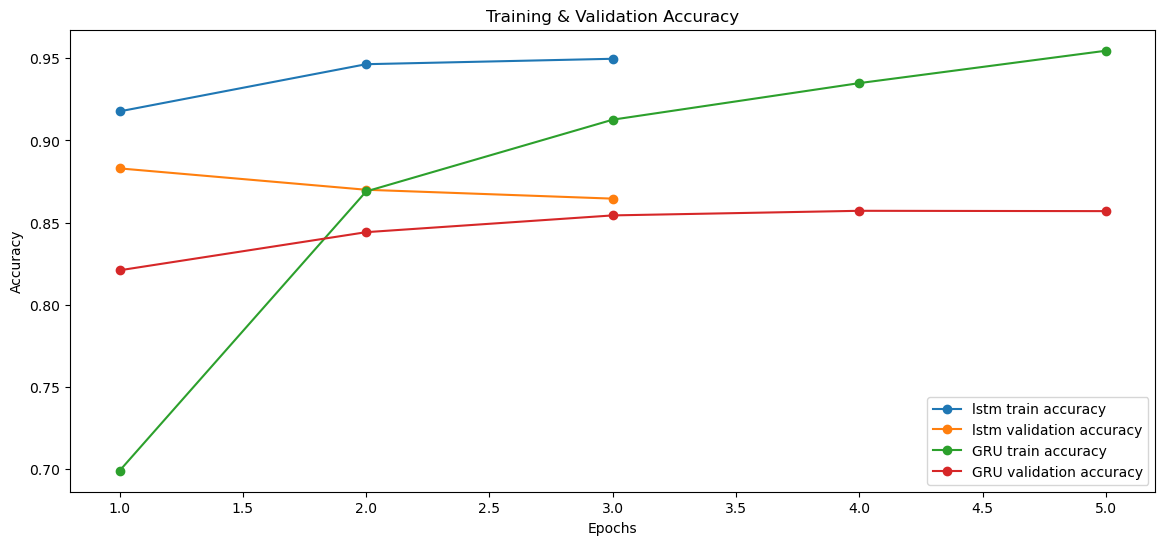

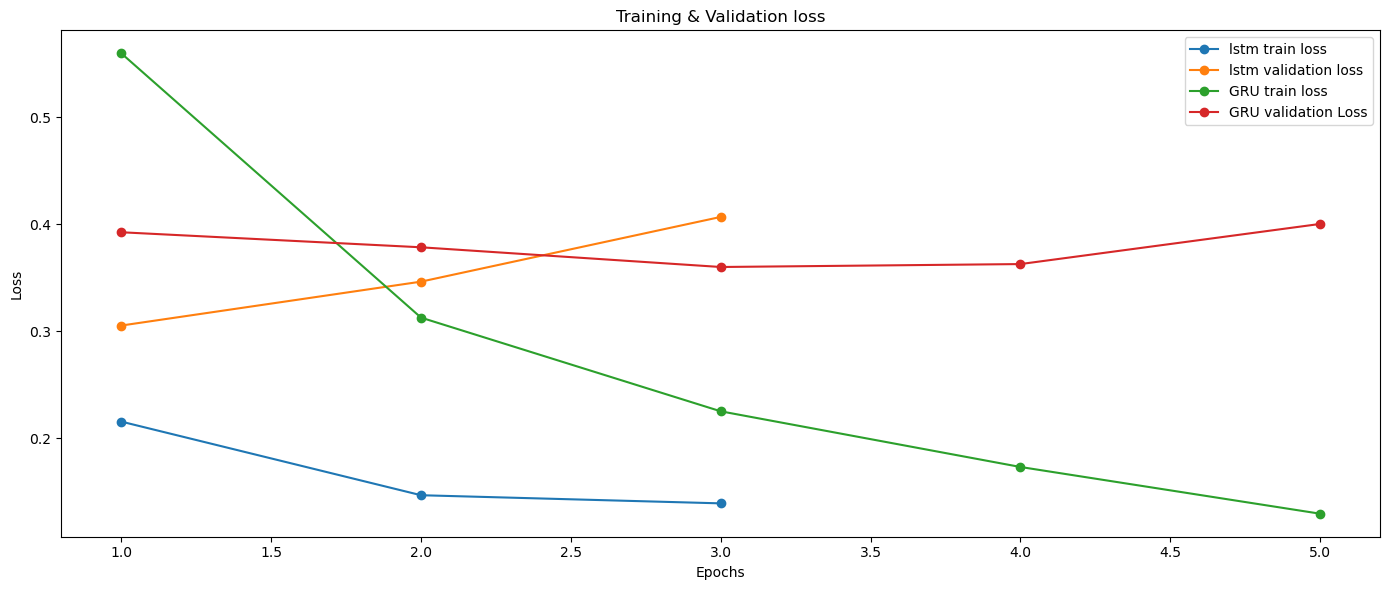

In [19]:
## Visualization

epochs_lstm = range(1, len(history_lstm.history['loss']) + 1)
epochs_gru = range(1, len(history_GRU.history['loss']) + 1)

plt.figure(figsize=(14,6))

plt.plot(epochs_lstm, history_lstm.history['accuracy'], 'o-', label='lstm train accuracy')
plt.plot(epochs_lstm, history_lstm.history['val_accuracy'], 'o-', label='lstm validation accuracy')
plt.plot(epochs_gru, history_GRU.history['accuracy'],'o-', label='GRU train accuracy')
plt.plot(epochs_gru, history_GRU.history['val_accuracy'], 'o-', label='GRU validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.figure(figsize=(14,6))

plt.plot(epochs_lstm, history_lstm.history['loss'], 'o-', label='lstm train loss')
plt.plot(epochs_lstm, history_lstm.history['val_loss'], 'o-', label='lstm validation loss')
plt.plot(epochs_gru, history_GRU.history['loss'],'o-', label='GRU train loss')
plt.plot(epochs_gru, history_GRU.history['val_loss'], 'o-', label='GRU validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation loss')
plt.legend()

plt.tight_layout()
plt.show()